# Movie Recommendation Systems


## Introduction

We are given a dataset from Kaggle called [Movie Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset). This document contains 45,000 movies released on or before July 2017. Data points include cast, crew, plot keywords, budget, revenue, posters release dates language, production companies, contries, TMBD vote counts, and vote averages. 

The Movie Dataset has files containing 26 million ratings from 270,000 users for all 45,000 movies. Ratings are on a scale of 1-5.

Our goal for this project is to create a search engine where the user can search for keywords and our model will give recommendations based on the keywords




Steps:



*   Create dataframes for each CSV File and merger relevent features into one files
*   Exploratory Data Analysis on the dataframe created

*   Find and create target column
*   Build and test classifers



Team Members:



*   *Samuel Adeleye*
*   *Nasir Barnes*
*   *Jermaine Lennon*
*   *Antoine Teague*


## Creating DataFrames

### Installing Kaggle API

The imports we will use to install the data

In [1]:
# Imports 
from google.colab import files
import zipfile
import os


Install your kaggle json file

In [2]:
!pip install -U -q kaggle
!mkdir  /root/.kaggle

# Upload kdggle.json api
files.upload()
!cp kaggle.json /root/.kaggle

Saving kaggle.json to kaggle.json


### Dowloading Data


Downloading data from [Kaggle](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset)

In [3]:
!kaggle datasets download -d rounakbanik/the-movies-dataset

 99% 225M/228M [00:03<00:00, 63.2MB/s]
100% 228M/228M [00:03<00:00, 64.7MB/s]


In [4]:
!chmod 600 /root/.kaggle/kaggle.json

This code allows us to unzip the file and remove it from this notebooks files


In [5]:
!apt install pv
!unzip -o /content/the-movies-dataset.zip  | pv -l >/dev/null


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  doc-base
The following NEW packages will be installed:
  pv
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 48.3 kB of archives.
After this operation, 123 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 pv amd64 1.6.6-1 [48.3 kB]
Fetched 48.3 kB in 0s (117 kB/s)
Selecting previously unselected package pv.
(Reading database ... 155653 files and directories currently installed.)
Preparing to unpack .../archives/pv_1.6.6-1_amd64.deb ...
Unpacking pv (1.6.6-1) ...
Setting up pv (1.6.6-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
8.00  0:00:24 [ 322m/s] [    <=>                                               ]


In [6]:
os.remove('the-movies-dataset.zip')

### Creating DataFrames

Imports we used to create dataframe

In [7]:
# Imports
import pandas as pd


In [8]:
# In this code block we will create the dataframes for each file
credits = pd.read_csv('credits.csv', engine= 'python', encoding= 'utf-8', error_bad_lines= False)
movie = pd.read_csv('movies_metadata.csv')
keywords = pd.read_csv('keywords.csv')
links = pd.read_csv('links.csv')
links_small = pd.read_csv('links_small.csv') 
ratings = pd.read_csv('ratings.csv')
ratings_small = pd.read_csv('ratings_small.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Content Based Recommandation System


With content based recommandation system we build a model to predict a movie using plot descriptions. 

In [9]:
#Imports
import numpy as np 
import pandas as pd 
import seaborn as sb 
import matplotlib.pyplot as plt

In [10]:
df = movie.copy()


In [11]:
cols= list(df.columns)
print(cols)

['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


Compute the parameters above:


First  mean of vote average column


In [12]:
C = df['vote_average'].mean()

Then compute the minimum number of votes required to be in the chart

In [13]:
m = df['vote_count'].quantile(0.90)


Compute the avergage rating of the movie

In [14]:
R = df['vote_average']


Compute vote count of the movie 

In [15]:
v= df['vote_count']

Define a function to compute the scores 


In [16]:
def get_weighting_rate(df,C=C,m=m):
    
    R = df['vote_average']
    v= df['vote_count']
    wr =  (v/(v+m) * R) + (m/(m+v) * C)
    return wr




Filtering the movies to be scored 


In [17]:
m_movies = df.loc[df['vote_count'] >= m]


Compute the score for every movie in the dataset 


In [18]:
m_movies['score']=m_movies.apply(get_weighting_rate,axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Show the movie title and its score  


In [19]:
m_movies[['title','score']].head(10)

,title,score
0,Toy Story,7.640253
1,Jumanji,6.820293
4,Father of the Bride Part II,5.660700
5,Heat,7.537201
8,Sudden Death,5.556626
9,GoldenEye,6.483983
10,The American President,6.107000
11,Dracula: Dead and Loving It,5.664630
12,Balto,6.693333
15,Casino,7.567740


Now sort the movies by thier score 


In [20]:
m_movies = m_movies.sort_values('score', ascending=False)


Show the top 20 scored movies 


In [21]:
m_movies[['title','vote_count','vote_average','score']].head(20) 

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


Visualizing what we have

Text(0.5, 1.0, 'Top Ten Movies')

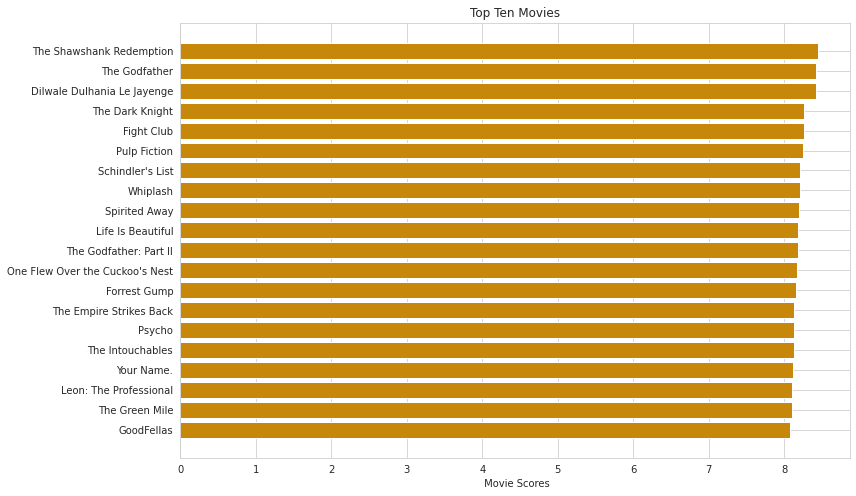

In [22]:
#plot the top twenty (you can top whatever you want) movies as bar plot 
topten_scores=m_movies['score'].head(20) 
#get the titles 
topten_titles=m_movies['title'].head(20) 
#plot the top twenty movies 
sb.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.barh(topten_titles,topten_scores, align='center',color='#C6870A')
plt.gca().invert_yaxis()
plt.xlabel(" Movie Scores")
plt.title("Top Ten Movies")


Print plot overviews of the first 5 movies.


In [23]:
plots= df['overview']
plots.head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

In [24]:
plots.shape


(45466,)

In [25]:
plots=plots[:20000]
plots.shape

(20000,)

### Model

In [26]:
#import TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words. 
tfidf = TfidfVectorizer(stop_words='english')

#Imute NaN with an empty string
plots =plots.fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(plots)

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(20000, 47487)

In [27]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
#show the shape of cos_sim matrix 
cos_sim.shape


(20000, 20000)

In [28]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df[:20000].index, index=df['title'][:20000]).drop_duplicates()
#show the some indices 
indices[:10]

title
Toy Story                      0
Jumanji                        1
Grumpier Old Men               2
Waiting to Exhale              3
Father of the Bride Part II    4
Heat                           5
Sabrina                        6
Tom and Huck                   7
Sudden Death                   8
GoldenEye                      9
dtype: int64

### Function that takes in movie title as input and outputs most similar movies


In [29]:
def get_recommendations(title, cos_sim=cos_sim):
    # Get the index of the movie that matches the title
    index = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cos_sim[index]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df['title'].iloc[movie_indices]


Get the recommandations 


In [52]:
get_recommendations('The Dark Knight')

18252                      The Dark Knight Rises
1328                              Batman Returns
15511                 Batman: Under the Red Hood
150                               Batman Forever
19792    Batman: The Dark Knight Returns, Part 1
585                                       Batman
3095                Batman: Mask of the Phantasm
18035                           Batman: Year One
9230          Batman Beyond: Return of the Joker
10122                              Batman Begins
Name: title, dtype: object

In [54]:
get_recommendations('X2')

7771            Sands of Iwo Jima
17217          X-Men: First Class
10973       X-Men: The Last Stand
3671                        X-Men
13635    X-Men Origins: Wolverine
10203               Russian Dolls
19020      Superman vs. The Elite
12836             Mulberry Street
6533                        Earth
5002                       Maryam
Name: title, dtype: object

## Genre Based Recommandation System

The Simple Recommender offers generalized recommnendations to every user based on movie popularity and (sometimes) genre. The basic idea behind this recommender is that movies that are more popular and more critically acclaimed will have a higher probability of being liked by the average audience. This model does not give personalized recommendations based on the user.

In [35]:
# Imports
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval




In [36]:
movie['genres'] = movie['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [37]:
vote_counts = movie[movie['vote_count'].notnull()]['vote_count'].astype('int')
vote_averages = movie[movie['vote_average'].notnull()]['vote_average'].astype('int')
C = vote_averages.mean()
C

5.244896612406511

In [38]:
m = vote_counts.quantile(0.95)
m


434.0

In [39]:
movie['year'] = pd.to_datetime(movie['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [40]:
qualified = movie[(movie['vote_count'] >= m) & (movie['vote_count'].notnull()) & (movie['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity', 'genres']]
qualified['vote_count'] = qualified['vote_count'].astype('int')
qualified['vote_average'] = qualified['vote_average'].astype('int')
qualified.shape

(2274, 6)

In [41]:
def weighted_rating(x):
    v = x['vote_count']
    R = x['vote_average']
    return (v/(v+m) * R) + (m/(m+v) * C)

In [42]:
qualified['wr'] = qualified.apply(weighted_rating, axis=1)


In [43]:
qualified = qualified.sort_values('wr', ascending=False).head(250)


In [44]:
s = movie.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'genre'
gen_movie = movie.drop('genres', axis=1).join(s)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """Entry point for launching an IPython kernel.


In [45]:
def build_chart(genre, percentile=0.85):
    df = gen_movie[gen_movie['genre'] == genre]
    vote_counts = df[df['vote_count'].notnull()]['vote_count'].astype('int')
    vote_averages = df[df['vote_average'].notnull()]['vote_average'].astype('int')
    C = vote_averages.mean()
    m = vote_counts.quantile(percentile)
    
    qualified = df[(df['vote_count'] >= m) & (df['vote_count'].notnull()) & (df['vote_average'].notnull())][['title', 'year', 'vote_count', 'vote_average', 'popularity']]
    qualified['vote_count'] = qualified['vote_count'].astype('int')
    qualified['vote_average'] = qualified['vote_average'].astype('int')
    
    qualified['wr'] = qualified.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) + (m/(m+x['vote_count']) * C), axis=1)
    qualified = qualified.sort_values('wr', ascending=False).head(250)
    
    return qualified

In [46]:
build_chart('Action').head(15)


,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.108149,7.955099
12481,The Dark Knight,2008,12269,8,123.167259,7.948610
4863,The Lord of the Rings: The Fellowship of the Ring,2001,8892,8,32.070725,7.929579
7000,The Lord of the Rings: The Return of the King,2003,8226,8,29.324358,7.924031
5814,The Lord of the Rings: The Two Towers,2002,7641,8,29.423537,7.918382
256,Star Wars,1977,6778,8,42.149697,7.908327
1154,The Empire Strikes Back,1980,5998,8,19.470959,7.896841
4135,Scarface,1983,3017,8,11.299673,7.802046
9430,Oldboy,2003,2000,8,10.616859,7.711649
1910,Seven Samurai,1954,892,8,15.01777,7.426145


In [47]:
build_chart('Horror').head(15)


,title,year,vote_count,vote_average,popularity,wr
1213,The Shining,1980,3890,8,19.611589,7.901294
1176,Psycho,1960,2405,8,36.826309,7.843335
1171,Alien,1979,4564,7,23.37742,6.941936
41492,Split,2016,4461,7,28.920839,6.940631
14236,Zombieland,2009,3655,7,11.063029,6.927969
1158,Aliens,1986,3282,7,21.761179,6.920081
21276,The Conjuring,2013,3169,7,14.90169,6.917338
42169,Get Out,2017,2978,7,36.894806,6.912248
1338,Jaws,1975,2628,7,19.726114,6.901088
8147,Shaun of the Dead,2004,2479,7,14.902948,6.895426


In [48]:
build_chart('Thriller').head(15)


,title,year,vote_count,vote_average,popularity,wr
15480,Inception,2010,14075,8,29.108149,7.956460
12481,The Dark Knight,2008,12269,8,123.167259,7.950165
292,Pulp Fiction,1994,8670,8,140.950236,7.929996
46,Se7en,1995,5915,8,18.45743,7.898573
24860,The Imitation Game,2014,5895,8,31.59594,7.898242
586,The Silence of the Lambs,1991,4549,8,4.307222,7.869538
11354,The Prestige,2006,4510,8,16.94556,7.868463
289,Leon: The Professional,1994,4293,8,20.477329,7.862142
4099,Memento,2000,4168,8,15.450789,7.858217
1213,The Shining,1980,3890,8,19.611589,7.848633
